# Post Imbalance Mitigation Profiling

This notebook serves as a visualization tool for the quantification of imbalance applied to the Bills data following multiple imbalance mitigation techniques (see 04_mitigating_imbalance). The methods applied are as follows:
- Random Undersampling
- k-Nearest-Neighbors Undersampling
- NearMiss Undersampling
- Random Oversampling
- Hybrid: Random Undersampling followed by Random Oversampling

The original data is also present for comparison purposes.

The main statistic of concern is the class ratios which numerical express the proportion of the data which contains each category. Post-imbalance-mitigation we would expect that the class ratios were more even or even the same, such that the imbalance ratio ($\frac{lowest\_proportion}{highest\_proportion}$) is 1.0.

The count plots (number of bills per category) are also important as it allows us to visualize the rough distribution of the attribute (legislativeSubjects). While some methods result in a lower overall imbalance ratio than expected, they may also maintain the overall distribution of the attribute which can be benefical as the data is more presentative of the original data while improving imbalance.

Note only the top 30 categories are shown in the count plot for ease of visualization.

Specific cases will be explained.

In [1]:
from utils.general import count_bar_plot
from utils.statistical import calculate_class_ratio_between_most_least

%matplotlib inline 
import pandas as pd 

In [2]:
original_data = pd.read_csv(
    "../../local_data/01_bills/generated_data/concat_compiled_subjects_with_text.csv.gz",
    compression="gzip",
    converters={
        "congress": str,
        "legislativeSubjects": pd.eval
    })


basic_random_under = pd.read_csv(
    "../../local_data/01_bills/generated_data/resampled_data/legislativeSubjects_basic_random_undersampling.csv.gz",
    compression="gzip",
    converters={
        "congress": str,
        "legislativeSubjects": pd.eval
    }
)
basic_knn_under = pd.read_csv(
    "../../local_data/01_bills/generated_data/resampled_data/legislativeSubjects_basic_knn_undersampling.csv.gz",
    compression="gzip",
    converters={
        "congress": str,
        "legislativeSubjects": pd.eval
    }
)
basic_nearmiss_under = pd.read_csv(
    "../../local_data/01_bills/generated_data/resampled_data/legislativeSubjects_basic_near_miss_undersampling.csv.gz",
    compression="gzip",
    converters={
        "congress": str,
        "legislativeSubjects": pd.eval
    }
)


basic_random_over = pd.read_csv(
    "../../local_data/01_bills/generated_data/resampled_data/legislativeSubjects_basic_random_oversampling.csv.gz",
    compression="gzip",
    converters={
        "congress": str,
        "legislativeSubjects": pd.eval
    }
)


random_under_over = pd.read_csv(
    "../../local_data/01_bills/generated_data/resampled_data/legislativeSubjects_rus_ros.csv.gz",
    compression="gzip",
    converters={
        "congress": str,
        "legislativeSubjects": pd.eval
    }
)
random_over_under = pd.read_csv(
    "../../local_data/01_bills/generated_data/resampled_data/legislativeSubjects_ros_rus.csv.gz",
    compression="gzip",
    converters={
        "congress": str,
        "legislativeSubjects": pd.eval
    }
)

### Original Data

To recap, the original dataset is incredibly imbalanced with regard to the legislativeSubjects, with category 'Government Operations and Politics' appearing over 30,000 times while 'Andorra', 'Airline law and legislative', 'Renegotiation' and others only appearing once. The overall imbalance ratio is extremely close to 0 and models trained on this data would be highly biased towards the more frequently occuring classes.

In [3]:
calculate_class_ratio_between_most_least(original_data, "legislativeSubjects")

Most dominant values in legislativeSubjects:
legislativeSubjects
Government Operations and Politics    0.016764
Congressional oversight               0.012047
Congress                              0.011932
Name: proportion, dtype: float64

Least dominant values in legislativeSubjects:
legislativeSubjects
Andorra                        5.433200e-07
Airline law and legislation    5.433200e-07
Renegotiation                  5.433200e-07
Name: proportion, dtype: float64
Overall Imbalance Ratio: 3e-05


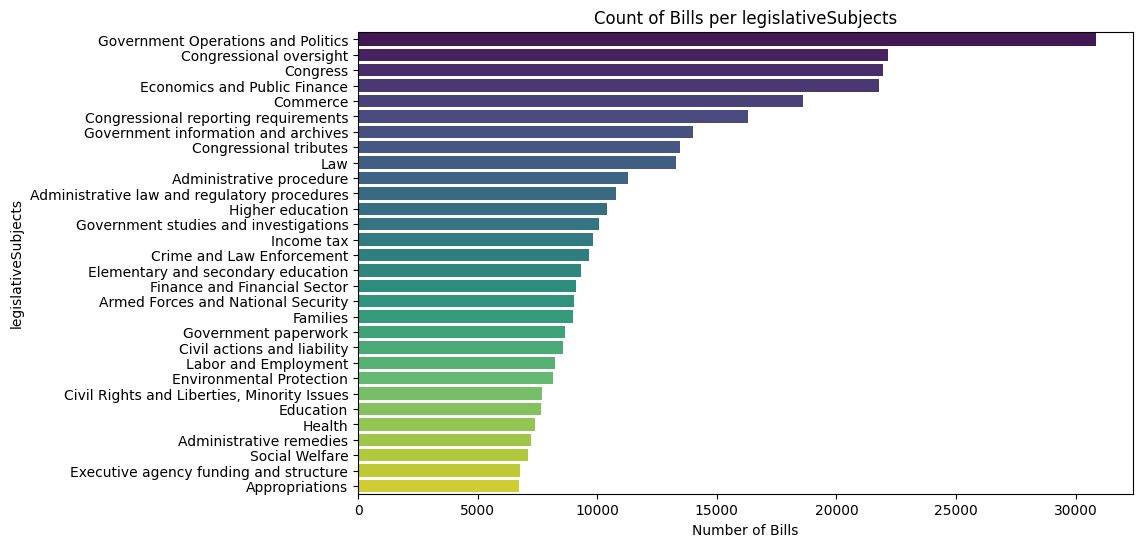

In [4]:
count_bar_plot(original_data, "legislativeSubjects", n=30)

In [5]:
print(f"Number of examples: {len(original_data)}")

Number of examples: 220013


### Random Undersampling

This technique involved randomly sampling from the majority classes such that the number count of the minority classes matched that of the majority (in this case, the count is 1). 

While this resulted in a perfect imbalance ratio with all class ratios being equal, we can see from the count plot that the overall distribution is vastly different from the original dataset. Additionally the total number of samples has been reduced from over 200,000 to approximately 6,000 with each label being different.

This data would not be ideal for the training of a classification model as due to the sparsity of labels and limited number of examples, the model would struggle to learn from this data or classify with any degree of accuracy.

In [6]:
calculate_class_ratio_between_most_least(basic_random_under, "legislativeSubjects")

Most dominant values in legislativeSubjects:
legislativeSubjects
Blood and blood diseases    0.000161
Meat substitutes            0.000161
Vegetarianism               0.000161
Name: proportion, dtype: float64

Least dominant values in legislativeSubjects:
legislativeSubjects
Mines (Ordnance)    0.000161
Tropical forests    0.000161
Fuel research       0.000161
Name: proportion, dtype: float64
Overall Imbalance Ratio: 1.0


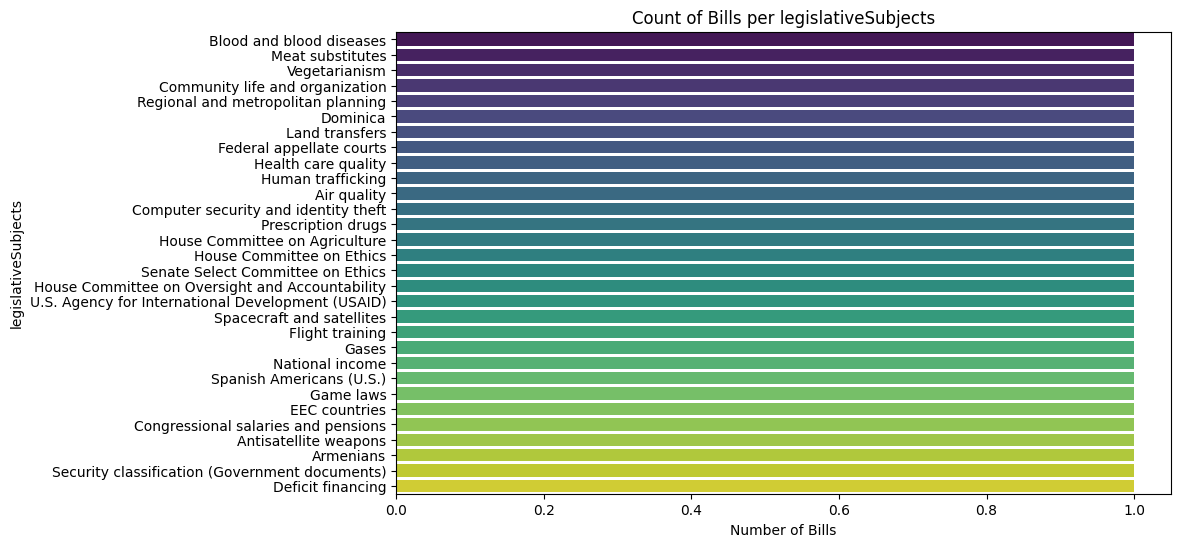

In [7]:
count_bar_plot(basic_random_under, "legislativeSubjects", n=30)

In [8]:
print(f"Number of examples: {len(basic_random_under)}")

Number of examples: 5965


# K-Nearest-Neighbors Undersampling

This method involves the removal of examples which are harder to classify whilst keeping examples which are easy to classify. Although this technique may improve training results, it will likely not generalize well. 

kNN Undersampling performs best in cases when there is a mixture of data types (categorical and numerical) and so seems to have struggled in this case due to the lack of data types. Due to this the overall imbalance ratio is still near 0.

In [9]:
calculate_class_ratio_between_most_least(basic_knn_under, "legislativeSubjects")

Most dominant values in legislativeSubjects:
legislativeSubjects
Government Operations and Politics    0.016987
Congressional oversight               0.012188
Congress                              0.012121
Name: proportion, dtype: float64

Least dominant values in legislativeSubjects:
legislativeSubjects
Food substitutes    5.521787e-07
Status offenders    5.521787e-07
Monaco              5.521787e-07
Name: proportion, dtype: float64
Overall Imbalance Ratio: 3e-05


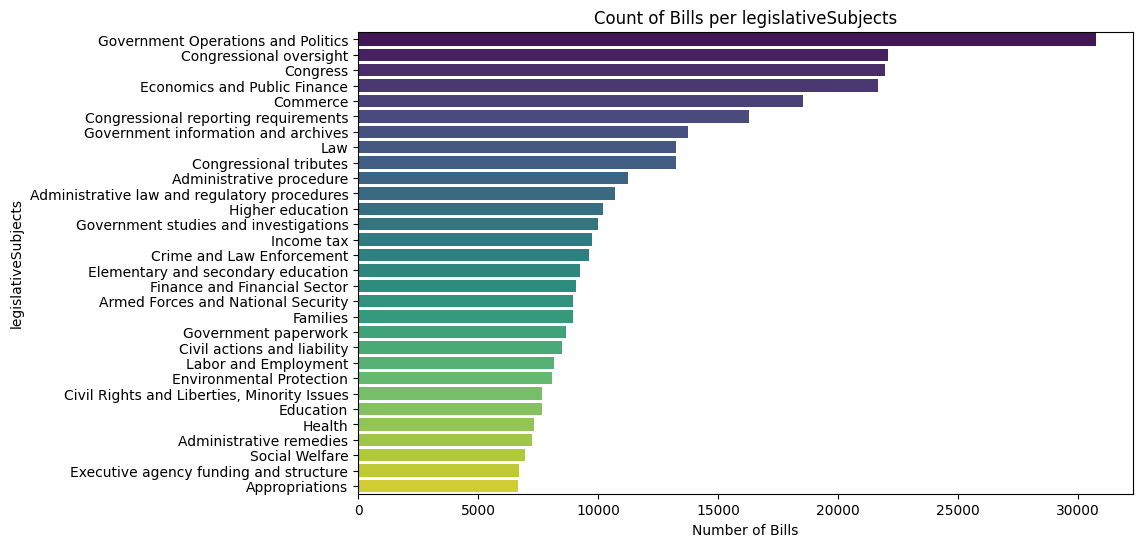

In [10]:
count_bar_plot(basic_knn_under, "legislativeSubjects", n=30)

In [11]:
print(f"Number of examples: {len(basic_knn_under)}")

Number of examples: 197799


### NearMiss Undersampling

This method removes samples from the dataset which are easier to classify whilst keeping the harder to classify examples.

Despite 'Government Operations and Politics' and 'Congress' still being the most common categories within legislativeSubjects, the least common categories now hold a greater overall proportion, with the overall imbalance ratio increasing to 0.001.

Although overall imbalance is still relatively high, this method has also maintained the overall distribution of the classes. Additionally, due to the implementation of this method the samples which are easier to classify have been removed from the data which may result in poorer training performance but better generalization. A potential challenge however may be the total number of examples in this dataset - some models may require a greater number of examples to learn from.

In [12]:
calculate_class_ratio_between_most_least(basic_nearmiss_under, "legislativeSubjects")

Most dominant values in legislativeSubjects:
legislativeSubjects
Government Operations and Politics      0.019870
Congress                                0.013175
Congressional reporting requirements    0.011502
Name: proportion, dtype: float64

Least dominant values in legislativeSubjects:
legislativeSubjects
Mars probes                  0.000021
Local service airlines       0.000021
Put and call transactions    0.000021
Name: proportion, dtype: float64
Overall Imbalance Ratio: 0.00108


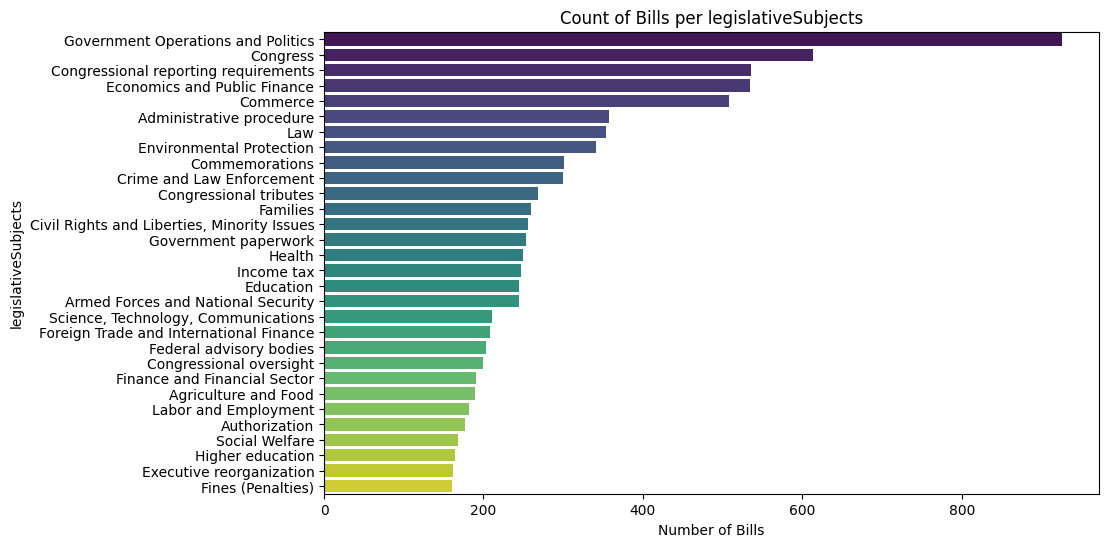

In [13]:
count_bar_plot(basic_nearmiss_under, "legislativeSubjects", n=30)

In [14]:
print(f"Number of examples: {len(basic_nearmiss_under)}")

Number of examples: 4160


### Random Oversampling

This technique involved randomly duplicating samples from the minority classes to reduce imbalance. Traditionally a minority class would be resamples n times such that the resulting class size is equal to the majority class size. Due to the huge discrepancy between these two values (1 vs over 30,000) this would be greatly computationally inefficient, and the resulting dataset would lead to massive overfitting due to the number of duplicates. The dataset size would also increase exponentially.

To counter this, the max number of resamples from the minority classes were set to 5.

Despite 'Government Operations and Politics' and 'Congress' still being the most common categories within legislativeSubjects, the least common categories now hold a slightly greater overall proportion, however overall imbalance is still high (overall imbalance ratio of 0.00016).

In [15]:
calculate_class_ratio_between_most_least(basic_random_over, "legislativeSubjects")

Most dominant values in legislativeSubjects:
legislativeSubjects
Government Operations and Politics    0.016571
Congressional oversight               0.011908
Congress                              0.011795
Name: proportion, dtype: float64

Least dominant values in legislativeSubjects:
legislativeSubjects
Quality circles                    0.000003
Materials management               0.000003
Delaware River Basin Commission    0.000003
Name: proportion, dtype: float64
Overall Imbalance Ratio: 0.00016


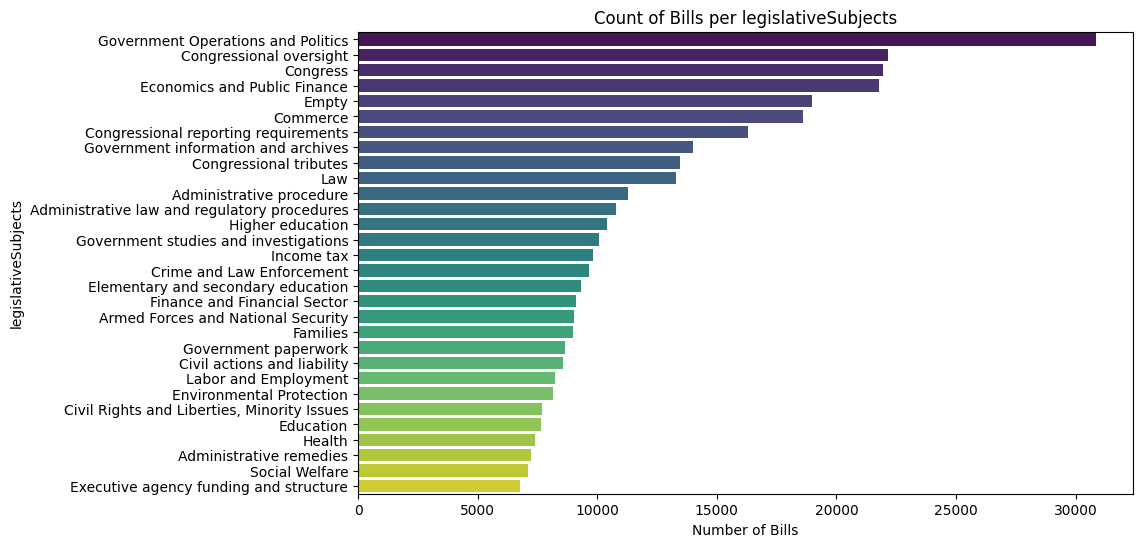

In [16]:
count_bar_plot(basic_random_over, "legislativeSubjects", n=30)

In [17]:
print(f"Number of examples: {len(basic_random_over)}")

Number of examples: 220013


### Hybrid: Random Undersampling followed by Random Oversampling

As a hybrid approach to reduce the drawbacks from both random under- and over-sampling, the methods have been combined.

Firstly random undersampling has been applied such that only 50 samples from the majority classes have been selected. Secondly, 5 duplicates have been taken from the minority classes. This means that the majority classes still remain the majority and the minority still remain the minority, however the imbalance between them have reduced with the overall imbalance ratio being 0.1. Whilst this doesn't entirely reflect the distribution of classes across the original dataset, it still keeps the overall relationship. Additionally the total number of samples is still high (around 100,000) which is benefically for model training.

In [18]:
calculate_class_ratio_between_most_least(random_under_over, "legislativeSubjects")

Most dominant values in legislativeSubjects:
legislativeSubjects
Foreign property        0.000244
Educational guidance    0.000244
Debt collection         0.000244
Name: proportion, dtype: float64

Least dominant values in legislativeSubjects:
legislativeSubjects
House Select Committee on Energy Independence and Global Warming    0.000024
Light                                                               0.000024
Food as a weapon                                                    0.000024
Name: proportion, dtype: float64
Overall Imbalance Ratio: 0.1


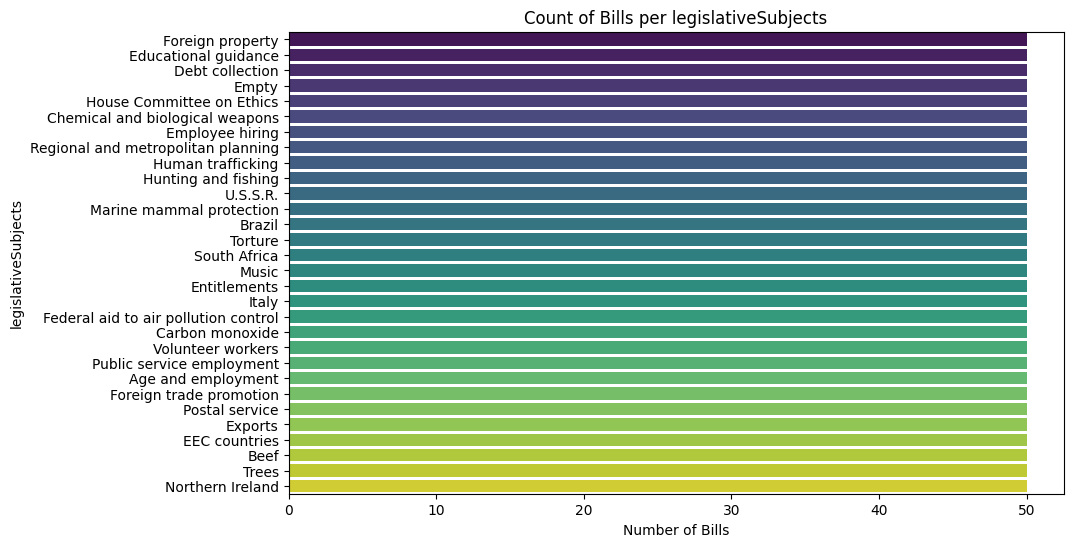

In [19]:
count_bar_plot(random_under_over, "legislativeSubjects", n=30)

In [20]:
print(f"Number of examples: {len(random_under_over)}")

Number of examples: 101051
